## Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [39]:
dataset = pd.read_csv("BankNote_Authentication.csv")
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Checking for Null Values

In [40]:
dataset.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [42]:
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## EDA

E:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



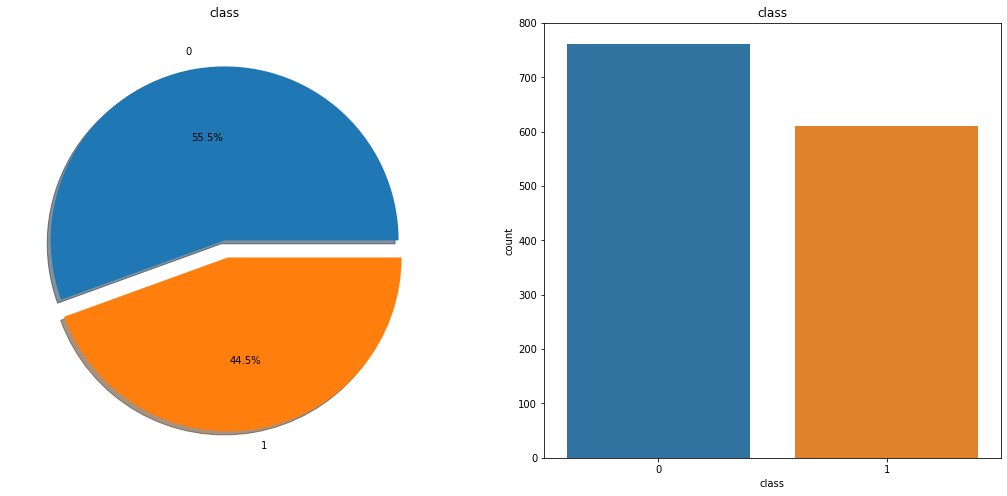

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('')
sns.countplot('class', data=dataset, ax=ax[1])
ax[1].set_title('class')
plt.show()

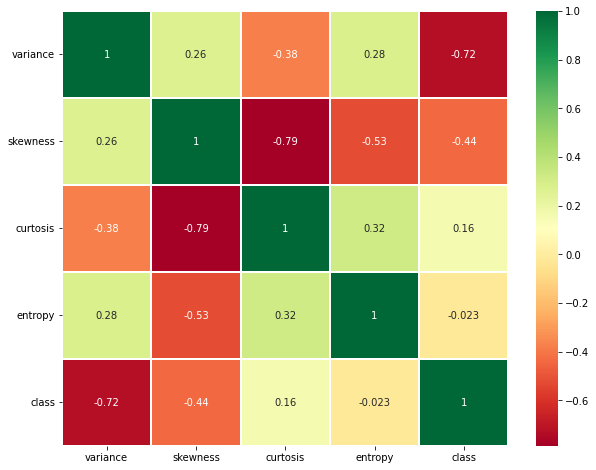

In [44]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

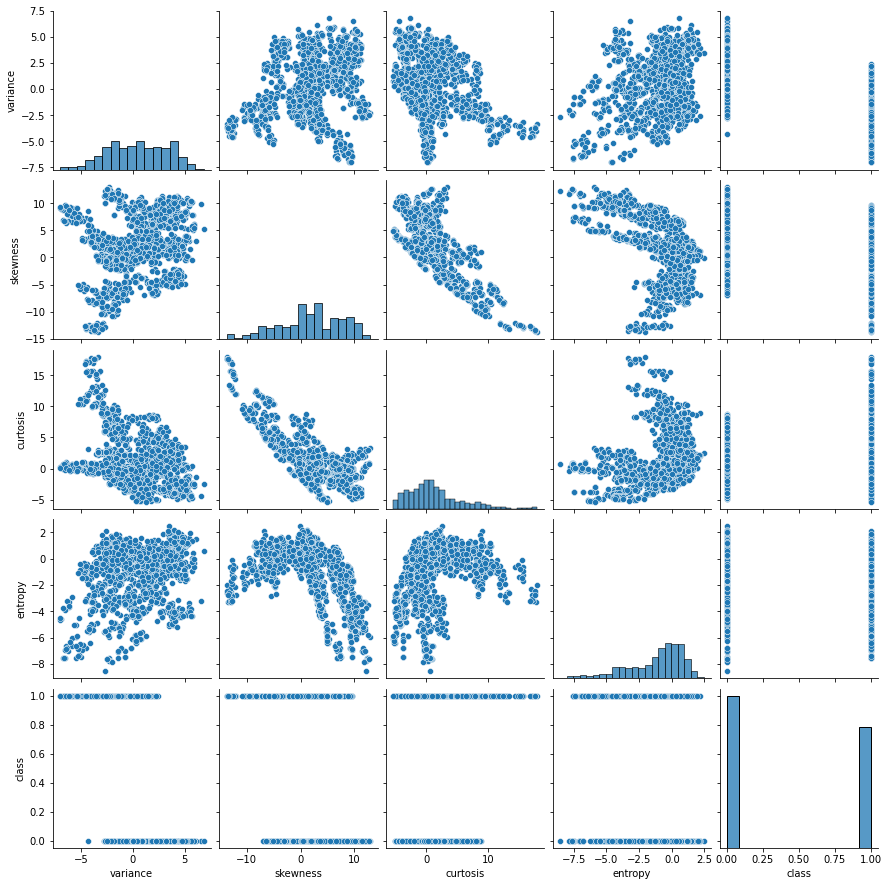

In [45]:
sns.pairplot(dataset)

## Dealing with Numeric Variables

In [46]:
num_cols = dataset.columns[:-1]

for col in num_cols:
    col_bin = pd.qcut(dataset[col], q=10)
    
    bin_name = col+"_bin"
    dataset[bin_name] = col_bin
    
dataset.drop(columns=num_cols, axis=1, inplace=True)

In [47]:
dataset.head()

,class,variance_bin,skewness_bin,curtosis_bin,entropy_bin
0,0,"(3.422, 4.118]","(7.643, 9.435]","(-3.439, -2.245]","(-0.587, -0.206]"
1,0,"(4.118, 6.825]","(7.643, 9.435]","(-3.439, -2.245]","(-1.81, -1.079]"
2,0,"(3.422, 4.118]","(-3.387, -0.378]","(1.416, 2.527]","(-0.206, 0.212]"
3,0,"(3.422, 4.118]","(9.435, 12.952]","(-5.287, -3.439]","(-4.254, -3.028]"
4,0,"(-0.404, 0.496]","(-6.478, -3.387]","(4.564, 7.881]","(-1.079, -0.587]"


## Seperating Dependent Variable

In [48]:
X = dataset.drop(columns=["class"], axis=1)
y = dataset["class"]

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col])

In [50]:
X.head()

,variance_bin,skewness_bin,curtosis_bin,entropy_bin
0,8,8,1,5
1,9,8,1,3
2,8,2,6,6
3,8,9,0,1
4,4,1,8,4


# Model

## Splitting Data into Training and Testing set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [52]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(),
    CatBoostClassifier()  
    ]

In [54]:
row_index = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    classifier_accuracy_score = accuracy_score(y_test, y_pred)

    kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

    MLA_name = classifier.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
    MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

    row_index+=1

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

E:\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed

[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pa

[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

E:\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pa

[18:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.010718
0:	learn: 0.6771341	total: 1.48ms	remaining: 1.48s
1:	learn: 0.6622557	total: 3.97ms	remaining: 1.98s
2:	learn: 0.6427896	total: 5.32ms	remaining: 1.77s
3:	learn: 0.6255247	total: 6.85ms	remaining: 1.71s
4:	learn: 0.6106851	total: 8.08ms	remaining: 1.61s
5:	learn: 0.5948786	total: 9.79ms	remaining: 1.62s
6:	learn: 0.5804035	total: 11.6ms	remaining: 1.64s
7:	learn: 0.5649553	total: 12.9ms	remaining: 1.6s
8:	learn: 0.5518003	total: 14.5ms	remaining: 1.6s
9:	learn: 0.5380364	total: 15.8ms	remaining: 1.56s
10:	learn: 0.5271221	total: 17.7ms	remaining: 1.59s
11:	learn: 0.5141852	total: 19.9ms	remaining: 1.64s
12:	learn: 0.5072718	total: 21.1ms	remaining: 1.

In [58]:
sorted_MLA_compare = MLA_compare.sort_values(
    by="K-Fold Accuracy",
    ascending=False).reset_index(drop=True).head(15)
sorted_MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,GaussianProcessClassifier,100.000000,99.909091
1,SVC,100.000000,99.909091
2,XGBClassifier,99.636364,99.636364
3,AdaBoostClassifier,99.636364,99.545455
4,KNeighborsClassifier,99.272727,99.545455
5,CatBoostClassifier,100.000000,99.454545
6,ExtraTreesClassifier,99.636364,99.453711
7,BaggingClassifier,99.272727,99.362802
8,DecisionTreeClassifier,99.272727,99.362802
9,RandomForestClassifier,99.636364,99.362802


In [61]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x = sorted_MLA_compare["MLA Name"],
    y = sorted_MLA_compare["Accuracy Score"],
))
fig.update_layout(
  title="Comparing Accuracy Scores of Machine Learning Models",
  xaxis_title="Machine Learning Algorithm",
  yaxis_title="Accuracy Score"
)

In [62]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = sorted_MLA_compare["MLA Name"],
    y = sorted_MLA_compare["K-Fold Accuracy"],
))
fig.update_layout(
  title="Comparing Accuracy Scores of Machine Learning Models",
  xaxis_title="Machine Learning Algorithm",
  yaxis_title="K-Fold Accuracy"
)